In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Read Data

In [34]:
data = pd.read_excel("Performance_Measurement_Spreadsheet.xlsx")
col = data.iloc[1].fillna(0) #extract column title
col.iloc[0] = 'Date'
data = data.iloc[2:]
data = data.rename(columns = col).drop(columns = 0).set_index('Date')
data = data.astype('float64')
data.head()

,RF,Mkt-RF,SMB,HML,UMD,Ln/Sh Eq Hedge Fund USD,Eq Mkt Ntr Hedge Fund USD,Ded Sh Bs Hedge Fund USD,Global Mac Hedge Fund USD,Mngd Fut Hedge Fund USD,Emg Mkts Hedge Fund USD,Evnt Drvn Hedge Fund USD,Cnvrt Arb Hedge Fund USD,Fx Inc Arb Hedge Fund USD,DJCS Hedge Fund USD
Date,,,,,,,,,,,,,,,
1994-01-31,0.0025,0.0290,0.0011,0.0215,0.0009,0.011733,-0.005467,-0.016267,0.001433,0.001933,0.105133,0.036533,0.003333,0.012733,0.011133
1994-02-28,0.0021,-0.0263,0.0272,-0.0137,-0.0027,-0.025011,0.002106,0.019713,-0.056811,0.011667,-0.011705,-0.001850,0.001188,-0.020346,-0.041240
1994-03-31,0.0027,-0.0485,-0.0090,0.0129,-0.0131,-0.039114,-0.002514,0.071827,-0.042854,0.025923,-0.046227,-0.013051,-0.009758,-0.016930,-0.035777
1994-04-29,0.0027,0.0068,-0.0088,0.0166,0.0039,-0.015720,0.002397,0.012710,-0.016033,0.008437,-0.083673,-0.006673,-0.025332,-0.002165,-0.017542
1994-05-31,0.0032,0.0062,-0.0205,0.0012,-0.0222,0.005550,-0.001229,0.022357,0.037839,0.007497,-0.007453,-0.001604,-0.010329,0.007780,0.022178


# Performance Measures

In [41]:
# Annualized arithmetic avage return
arith_ave_ret = data.mean()*12

# Annualized geometric average return
geo_ave_ret = np.power(np.power((data+1).prod(),1/len(data)),12)-1 #power(x,y) : x^(y)

#Annualized volatility of excess returns 
ann_volatility = data.sub(data.RF, axis=0).std()*np.sqrt(12) # data.sub(data.RF, axis=0)  substract data.RF very colum(axis=0)

#Anualized Sharpe ratio
ann_sharpe_ratio = 12*data.sub(data.RF, axis=0).mean()/ann_volatility

# Market beta
market_beta = data.cov()['Mkt-RF']/data['Mkt-RF'].var() # data.cov(): covariance matrix

# Annualized Alpha
ann_alpha = (data.sub(data.RF, axis=0)-pd.DataFrame(data['Mkt-RF']).dot(pd.DataFrame(market_beta).transpose())).mean()*12

# Annualized Information Ratio
ann_IR = np.sqrt(12)*(data.sub(data['Mkt-RF'],axis=0)).mean()/(data.sub(data['Mkt-RF'],axis=0)).std()

# Maxmium drawndown
df = (data+1).cumprod()
Roll_max = df.rolling(window = len(df), min_periods=1).max()
draw_down = (df/Roll_max.shift(1)-1).fillna(0)
draw_down = draw_down.applymap(lambda x: 0 if x>0 else x)
max_drawdown = draw_down.min()

# Skewness of monthly excess returns
skewness = data.sub(data.RF, axis=0).skew()

# Excess kurtosis of monthly excess returns
kurtosis = data.sub(data.RF, axis=0).kurt()

# Plot cumulative return & drawdown

(0.0, -1.0)

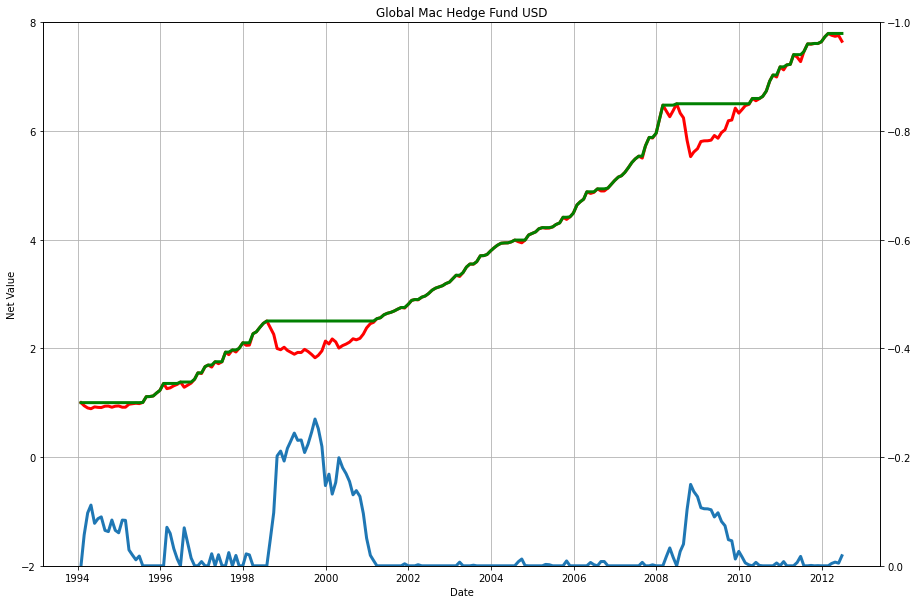

In [76]:
fig, ax = plt.subplots(1,1, figsize = (15,10))
ax.plot(df.index, df['Global Mac Hedge Fund USD'],c = 'red' ,linewidth=3)
ax.plot(df.index, Roll_max['Global Mac Hedge Fund USD'],c = 'green' ,linewidth=3)
ax.grid()
ax.set_xlabel("Date")
ax.set_ylabel("Net Value")
ax.set_title("Global Mac Hedge Fund USD")
ax.set_ylim(-2,8)
ax2 = ax.twinx()
ax2.plot(df.index, draw_down['Global Mac Hedge Fund USD'], linewidth = 3)
ax2.set_ylim(0,-1)

# Factor Model

In [42]:
#  A univariate regression of the hedge fund index’s excess return on market excess return
model = sm.OLS(data['Ln/Sh Eq Hedge Fund USD'], sm.add_constant(data['Mkt-RF']))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Ln/Sh Eq Hedge Fund USD   R-squared:                       0.565
Model:                                 OLS   Adj. R-squared:                  0.563
Method:                      Least Squares   F-statistic:                     286.1
Date:                     Tue, 01 Nov 2022   Prob (F-statistic):           1.13e-41
Time:                             03:55:48   Log-Likelihood:                 565.91
No. Observations:                      222   AIC:                            -1128.
Df Residuals:                          220   BIC:                            -1121.
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0052      0.001      4.052      0.000       0.003       0.008
Mkt-RF         0.4598      0.027     16.915      0.000       0.406       0.513
==============================================================================
Omnibus:                       49.231   Durbin-Watson:                   1.643
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              215.611
Skew:                           0.779   Prob(JB):                     1.52e-47
Kurtosis:                       7.570   Cond. No.                         21.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
# A multivariate regression on the market, size, value, and momentum factors
model = sm.OLS(data['Ln/Sh Eq Hedge Fund USD'], sm.add_constant(data[['Mkt-RF', 'SMB', 'HML', 'UMD']]))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Ln/Sh Eq Hedge Fund USD   R-squared:                       0.760
Model:                                 OLS   Adj. R-squared:                  0.756
Method:                      Least Squares   F-statistic:                     172.1
Date:                     Tue, 01 Nov 2022   Prob (F-statistic):           4.09e-66
Time:                             03:57:03   Log-Likelihood:                 631.99
No. Observations:                      222   AIC:                            -1254.
Df Residuals:                          217   BIC:                            -1237.
Df Model:                                4                                         
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0041      0.001      4.218      0.000       0.002       0.006
Mkt-RF         0.4710      0.023     20.825      0.000       0.426       0.516
SMB            0.1712      0.029      5.813      0.000       0.113       0.229
HML           -0.0797      0.031     -2.543      0.012      -0.141      -0.018
UMD            0.1710      0.019      9.105      0.000       0.134       0.208
==============================================================================
Omnibus:                        0.779   Durbin-Watson:                   1.567
Prob(Omnibus):                  0.677   Jarque-Bera (JB):                0.588
Skew:                           0.120   Prob(JB):                        0.745
Kurtosis:                       3.077   Cond. No.                         36.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""